# Graded Assessment -- AAI 6350 Recommender Systems Course --

# Part 1: Recommendation System Using GCNN [weight: 40\%]

# Step 1: Data Preparation
- Load the Data: Read the Excel file and extract the relevant columns (CustomerID, StockCode, Quantity).
- Data Cleaning: Ensure there are no missing values in the relevant columns.
- Create Interaction Matrix: Construct an adjacency matrix where rows represent customers and columns represent items. The values in the matrix will be the quantities purchased.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_excel('Rec_sys_data.xlsx')

# Create a pivot table to form the interaction matrix
interaction_matrix = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

# Convert to a NumPy array for further processing
interaction_matrix = interaction_matrix.values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272404 entries, 0 to 272403
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     272404 non-null  int64         
 1   StockCode     272404 non-null  object        
 2   Quantity      272404 non-null  int64         
 3   InvoiceDate   272404 non-null  datetime64[ns]
 4   DeliveryDate  272404 non-null  datetime64[ns]
 5   Discount%     272404 non-null  float64       
 6   ShipMode      272404 non-null  object        
 7   ShippingCost  272404 non-null  float64       
 8   CustomerID    272404 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 18.7+ MB


In [ ]:
data.describe()

,InvoiceNo,Quantity,InvoiceDate,DeliveryDate,Discount%,ShippingCost,CustomerID
count,272404.000000,272404.000000,272404,272404,272404.000000,272404.000000,272404.000000
mean,553740.733319,13.579536,2011-05-16 04:33:17.259658240,2011-05-18 04:33:04.572620288,0.300092,17.053491,15284.323523
min,536365.000000,1.000000,2010-12-01 08:26:00,2010-12-02 08:26:00,0.000000,5.810000,12346.000000
25%,545312.000000,2.000000,2011-03-01 13:51:00,2011-03-03 14:53:00,0.150000,5.810000,13893.000000
50%,553902.000000,6.000000,2011-05-19 18:02:00,2011-05-22 08:52:30,0.300000,15.220000,15157.000000
75%,562457.000000,12.000000,2011-08-05 11:00:00,2011-08-07 12:05:00,0.450000,30.120000,16788.000000
max,569629.000000,74215.000000,2011-10-05 11:37:00,2011-10-08 11:37:00,0.600000,30.120000,18287.000000
std,9778.082879,149.136756,NaN,NaN,0.176023,10.013210,1714.478624


In [ ]:


# Check for zero values in specific columns
zero_quantity = data[data['Quantity'] == 0]
print("Rows with zero quantity:\n", zero_quantity)

# Check for zero values in the entire DataFrame
zero_values_df = data[data.isin([0]).any(axis=1)]
print("\nRows with any zero values:\n", zero_values_df)

# Check for zero values in the interaction matrix
zero_interaction = interaction_matrix == 0
print("\nNumber of zeros in the interaction matrix:", np.sum(zero_interaction))

# Check specific columns for zeros
zero_customerID = data[data['CustomerID'] == 0]
print("\nRows with zero CustomerID:\n", zero_customerID)

zero_stockCode = data[data['StockCode'] == 0]  # Or check for empty string if applicable
print("\nRows with zero StockCode:\n", zero_stockCode)


Rows with zero quantity:
 Empty DataFrame
Columns: [InvoiceNo, StockCode, Quantity, InvoiceDate, DeliveryDate, Discount%, ShipMode, ShippingCost, CustomerID]
Index: []

Rows with any zero values:
         InvoiceNo StockCode  Quantity         InvoiceDate        DeliveryDate  \
252        536394     22652        20 2010-12-01 10:39:00 2010-12-03 10:39:00   
335        536401     20726         1 2010-12-01 11:21:00 2010-12-02 11:21:00   
349        536401     22662         1 2010-12-01 11:21:00 2010-12-04 11:21:00   
390        536404     20727        10 2010-12-01 11:29:00 2010-12-03 11:29:00   
419        536406     21071         6 2010-12-01 11:33:00 2010-12-03 11:33:00   
...           ...       ...       ...                 ...                 ...   
272122     569568     22964         6 2011-10-05 09:57:00 2011-10-07 09:57:00   
272181     569568     22352         6 2011-10-05 09:57:00 2011-10-08 09:57:00   
272267     569573     23096        72 2011-10-05 10:11:00 2011-10-07 10:11

In [ ]:

# Drop rows with missing values in 'CustomerID', 'StockCode', and 'Quantity'
data = data.dropna(subset=['CustomerID', 'StockCode', 'Quantity'])

# After handling missing values, recreate the interaction matrix
interaction_matrix = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)
interaction_matrix = interaction_matrix.values


In [ ]:
df_customer = pd.read_excel('./Rec_sys_data.xlsx', 'customer')
df_product = pd.read_excel('./Rec_sys_data.xlsx', 'product')

In [ ]:
df_customer.head()

,CustomerID,Gender,Age,Income,Zipcode,Customer Segment
0,13089,male,53,High,8625,Small Business
1,15810,female,22,Low,87797,Small Business
2,15556,female,29,High,29257,Corporate
3,13137,male,29,Medium,97818,Middle class
4,16241,male,36,Low,79200,Small Business


In [ ]:
df_product.head()

,StockCode,Product Name,Description,Category,Brand,Unit Price
0,22629,Ganma Superheroes Ordinary Life Case For Samsu...,"New unique design, great gift.High quality pla...",Cell Phones|Cellphone Accessories|Cases & Prot...,Ganma,13.99
1,21238,Eye Buy Express Prescription Glasses Mens Wome...,Rounded rectangular cat-eye reading glasses. T...,Health|Home Health Care|Daily Living Aids,Eye Buy Express,19.22
2,22181,MightySkins Skin Decal Wrap Compatible with Ni...,Each Nintendo 2DS kit is printed with super-hi...,Video Games|Video Game Accessories|Accessories...,Mightyskins,14.99
3,84879,Mediven Sheer and Soft 15-20 mmHg Thigh w/ Lac...,The sheerest compression stocking in its class...,Health|Medicine Cabinet|Braces & Supports,Medi,62.38
4,84836,Stupell Industries Chevron Initial Wall D cor,Features: -Made in the USA. -Sawtooth hanger o...,Home Improvement|Paint|Wall Decals|All Wall De...,Stupell Industries,35.99


# Step 2: Graph Construction [25 points]
- Graph Representation: Each customer and item will be a node in the graph. An edge exists between a customer and an item if the customer has purchased that item.
- Adjacency Matrix: Create an adjacency matrix where the rows represent customers and the columns represent items.

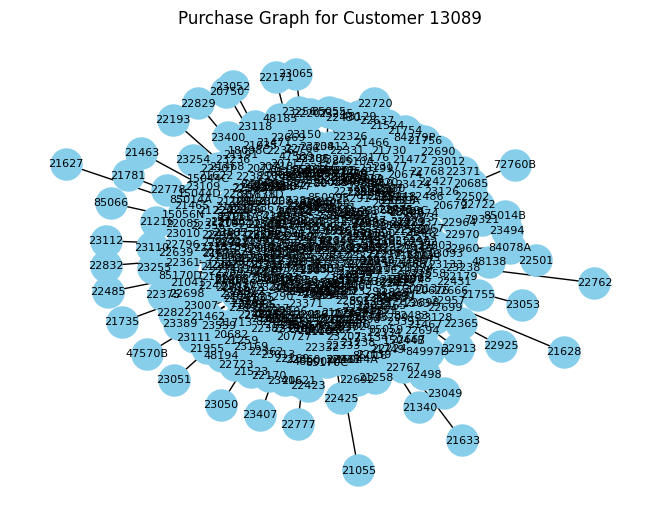

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'interaction_matrix' and 'data' are defined as in the previous code

def create_customer_graph(customer_id):

    # Get the customer's purchase data
    customer_data = data[data['CustomerID'] == customer_id]

    if customer_data.empty:
      print(f"No data found for CustomerID: {customer_id}")
      return None

    # Create a graph
    customer_graph = nx.Graph()

    # Add customer node
    customer_graph.add_node(customer_id, node_type="customer")

    # Add item nodes and edges based on purchases
    for index, row in customer_data.iterrows():
        stock_code = row['StockCode']
        quantity = row['Quantity']
        customer_graph.add_node(stock_code, node_type="item")
        customer_graph.add_edge(customer_id, stock_code, weight=quantity)

    return customer_graph

# Example usage: Create and visualize the graph for CustomerID 13089 first customer in the data
customer_id_to_visualize = 13089  # Replace with the desired customer ID
customer_graph = create_customer_graph(customer_id_to_visualize)

if customer_graph:
    # Draw the graph
    pos = nx.spring_layout(customer_graph)  # You can experiment with different layouts
    nx.draw(customer_graph, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=8)
    edge_labels = nx.get_edge_attributes(customer_graph, 'weight')
    nx.draw_networkx_edge_labels(customer_graph, pos, edge_labels=edge_labels)
    plt.title(f"Purchase Graph for Customer {customer_id_to_visualize}")
    plt.show()


In [ ]:


import networkx as nx

# Create a graph object
graph = nx.Graph()

# Add nodes for customers
num_customers = adjacency_matrix.shape[0]
graph.add_nodes_from(range(num_customers), node_type='customer')

# Add nodes for items
num_items = adjacency_matrix.shape[1]
graph.add_nodes_from(range(num_customers, num_customers + num_items), node_type='item')

# Add edges based on the adjacency matrix
for customer_index in range(num_customers):
    for item_index in range(num_items):
        if adjacency_matrix[customer_index, item_index] == 1:
            graph.add_edge(customer_index, num_customers + item_index)



# Example: Get the degree of a node (number of connections)
degree = graph.degree[0]  # Degree of the first customer node
print(f"Degree of customer node 0: {degree}")

# Example: Find the neighbors of a node
neighbors = list(graph.neighbors(0)) # Neighbors of the first customer node
print(f"Neighbors of customer node 0: {neighbors}")


Degree of customer node 0: 1
Neighbors of customer node 0: [5573]


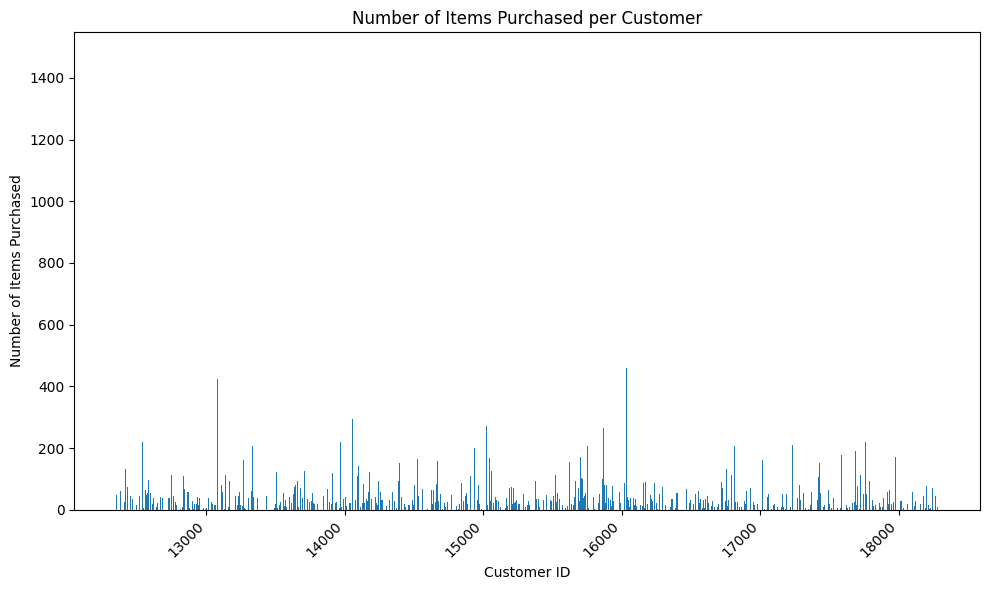

In [ ]:

import matplotlib.pyplot as plt

# Get the degree of each customer node
customer_degrees = dict(graph.degree(customers))

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(customer_degrees.keys(), customer_degrees.values())
plt.xlabel("Customer ID")
plt.ylabel("Number of Items Purchased")
plt.title("Number of Items Purchased per Customer")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:

interaction_matrix


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 2.25],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

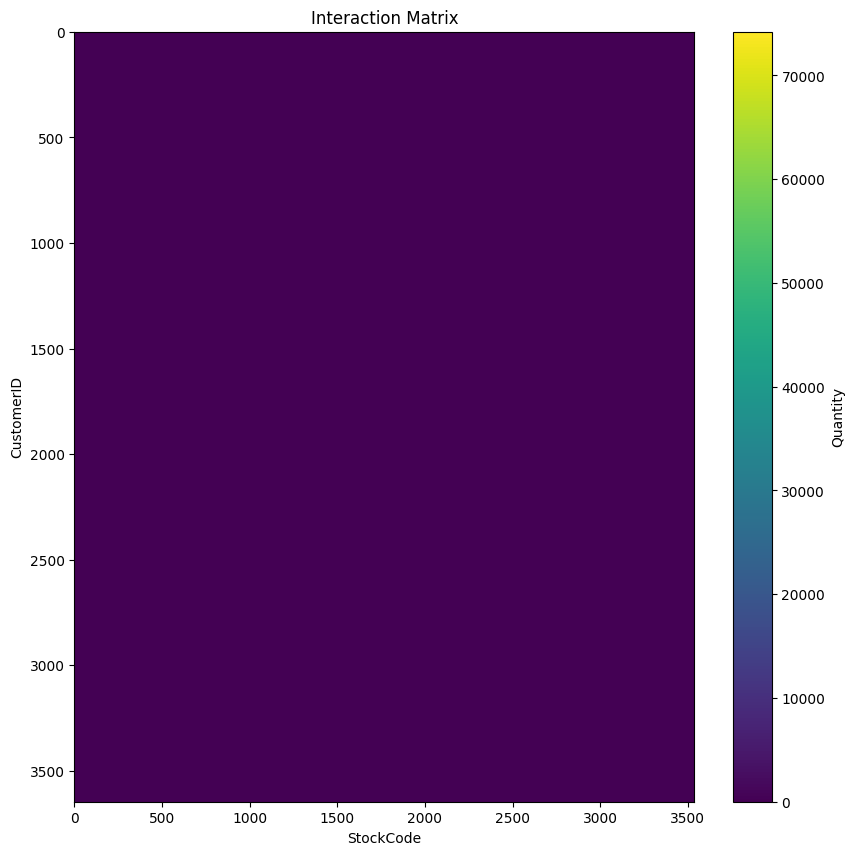

In [ ]:


import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))  # Adjust figure size as needed
plt.imshow(interaction_matrix, cmap='viridis', aspect='auto')  # Use a colormap for better visualization
plt.colorbar(label='Quantity') # add colorbar
plt.xlabel("StockCode")
plt.ylabel("CustomerID")
plt.title("Interaction Matrix")
plt.show()


# Step 3: Model Definition (GCNN) [35 points]
- Define the GCNN Architecture: Use a library like PyTorch Geometric or TensorFlow with Keras to define the GCNN model.
- The model will consist of graph convolutional layers that learn representations for both customers and items.
- Prepare Data for Training: Convert the adjacency matrix and features into a format suitable for the GCNN.

In [ ]:
!pip install torch-geometric torch-sparse torch-scatter

  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Preparing metadata (setup.py) ... done
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp311-cp311-linux_x86_64.whl size=1127937 sha256=aede31877f0bfc4b1f3cf51ece5ccf0b8476dee287d9ecf9a596420339b1ed13
  Stored in directory: /root/.cache/pip/wheels/75/e2/1e/299c596063839303657c211f587f05591891cc6cf126d94d21
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp311-cp311-linux_x86_64.whl size=547368 sha256=865fef418218bd37509d41d0eba1968b4d5817f5ff34a81eefae325de0c8a348
  Stored in directory: /root/.cache/pip/wheels/b8/d4/0e/a80af2465354ea7355a2c153b11af2da739cfcf08b6c0b28e2
Successfully built torch-sparse torch-scatter


In [ ]:

import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data


#  Convert interaction matrix to a sparse adjacency matrix for PyTorch Geometric
import scipy.sparse as sp
adjacency_matrix = (interaction_matrix > 0).astype(int)  # Binary adjacency matrix
adjacency_matrix = sp.csr_matrix(adjacency_matrix)


# Create a PyTorch Geometric Data object
num_customers = interaction_matrix.shape[0]
num_items = interaction_matrix.shape[1]

customer_features = torch.randn(num_customers, 10)  # Example: 10-dimensional customer features
item_features = torch.randn(num_items, 10)         # Example: 10-dimensional item features

# Concatenate features
features = torch.cat((customer_features, item_features), dim=0)

# Define the edge index for the graph (connections between customer and item nodes)
row_indices, col_indices = adjacency_matrix.nonzero()
edge_index = torch.tensor([row_indices, col_indices + num_customers], dtype=torch.long)


data = Data(x=features, edge_index=edge_index)


# Define the GCNN model
class GCNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Initialize the model
in_channels = features.size(1)  # Input feature dimension
hidden_channels = 64           # Number of hidden units
out_channels = 16              # Output embedding dimension

model = GCNN(in_channels, hidden_channels, out_channels)


# Example usage (replace with your training loop)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Assuming you have labels (e.g., ratings)
# Replace this with your actual labels and loss function
labels = torch.randn(num_customers, 1)  # Example labels
criterion = torch.nn.MSELoss()

model.train()
for epoch in range(100):  # Number of training epochs
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[:num_customers], labels) # Consider only customer outputs
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch + 1}, Loss: {loss.item()}")

# Get customer embeddings after training
customer_embeddings = model(data.x, data.edge_index)[:num_customers]


<ipython-input-28-70fc166632d9>:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  edge_index = torch.tensor([row_indices, col_indices + num_customers], dtype=torch.long)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([3647, 1])) that is different to the input size (torch.Size([3647, 16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1, Loss: 1.3786330223083496
Epoch: 2, Loss: 1.267308235168457
Epoch: 3, Loss: 1.1979122161865234
Epoch: 4, Loss: 1.1470386981964111
Epoch: 5, Loss: 1.1016066074371338
Epoch: 6, Loss: 1.0771454572677612
Epoch: 7, Loss: 1.0510984659194946
Epoch: 8, Loss: 1.0359808206558228
Epoch: 9, Loss: 1.0227677822113037
Epoch: 10, Loss: 1.0118571519851685
Epoch: 11, Loss: 1.0010526180267334
Epoch: 12, Loss: 0.9975168108940125
Epoch: 13, Loss: 0.9864535927772522
Epoch: 14, Loss: 0.9857667684555054
Epoch: 15, Loss: 0.9812432527542114
Epoch: 16, Loss: 0.9794954657554626
Epoch: 17, Loss: 0.9766761660575867
Epoch: 18, Loss: 0.9734804034233093
Epoch: 19, Loss: 0.9730226993560791
Epoch: 20, Loss: 0.9714241623878479
Epoch: 21, Loss: 0.9706912040710449
Epoch: 22, Loss: 0.9689332842826843
Epoch: 23, Loss: 0.966838538646698
Epoch: 24, Loss: 0.9673135280609131
Epoch: 25, Loss: 0.967301607131958
Epoch: 26, Loss: 0.9661403894424438
Epoch: 27, Loss: 0.967159628868103
Epoch: 28, Loss: 0.9676632881164551
Epoch

# Step 4: Training the Model [40 points]

- Loss Function: Use a suitable loss function, such as Mean Squared Error (MSE) as we are working with continuous interaction scores.
- Optimizer: Choose an optimizer like Adam or SGD.
- Training Loop: Implement the training loop to update the model weights based on the loss. In each epoch, calculate the predictions using the model, compute the loss between predicted and actual values, and perform backpropagation to update the model's weights.
- Also compute the validation loss to evaluate the model's performance on unseen data, and use early stopping to halt training when the validation loss stops improving, preventing overfitting.

In [ ]:

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

labels = torch.tensor(interaction_matrix, dtype=torch.float32) # Use the interaction matrix as labels
criterion = torch.nn.MSELoss()

model.train()
for epoch in range(100):  # Number of training epochs
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[:num_customers], labels) # Consider only customer outputs
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch + 1}, Loss: {loss.item()}")

# Get customer embeddings after training
customer_embeddings = model(data.x, data.edge_index)[:num_customers]


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([3647, 3538])) that is different to the input size (torch.Size([3647, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1, Loss: 455.9388122558594
Epoch: 2, Loss: 452.0218505859375
Epoch: 3, Loss: 450.2484436035156
Epoch: 4, Loss: 449.4974365234375
Epoch: 5, Loss: 449.2191467285156
Epoch: 6, Loss: 449.1882629394531
Epoch: 7, Loss: 449.23297119140625
Epoch: 8, Loss: 449.25469970703125
Epoch: 9, Loss: 449.2391662597656
Epoch: 10, Loss: 449.22344970703125
Epoch: 11, Loss: 449.2058410644531
Epoch: 12, Loss: 449.1963195800781
Epoch: 13, Loss: 449.1873779296875
Epoch: 14, Loss: 449.18182373046875
Epoch: 15, Loss: 449.17840576171875
Epoch: 16, Loss: 449.1737365722656
Epoch: 17, Loss: 449.1717224121094
Epoch: 18, Loss: 449.16741943359375
Epoch: 19, Loss: 449.1646423339844
Epoch: 20, Loss: 449.1607971191406
Epoch: 21, Loss: 449.15985107421875
Epoch: 22, Loss: 449.1576232910156
Epoch: 23, Loss: 449.1549377441406
Epoch: 24, Loss: 449.1567687988281
Epoch: 25, Loss: 449.1558837890625
Epoch: 26, Loss: 449.15435791015625
Epoch: 27, Loss: 449.1558837890625
Epoch: 28, Loss: 449.1580505371094
Epoch: 29, Loss: 449.

In [ ]:

# Define the training and validation sets
train_ratio = 0.8
train_size = int(num_customers * train_ratio)
train_indices = torch.arange(train_size)
val_indices = torch.arange(train_size, num_customers)

# Assuming 'interaction_matrix' is your target variable
train_labels = torch.tensor(interaction_matrix[:train_size], dtype=torch.float32)
val_labels = torch.tensor(interaction_matrix[train_size:], dtype=torch.float32)


optimizer = torch.optim.Adam(model.parameters(), lr=0.001) #Reduced learning rate
criterion = torch.nn.MSELoss()

best_val_loss = float('inf')
patience = 10  # Number of epochs to wait for improvement
epochs_no_improve = 0

model.train()
for epoch in range(200):  # Increased number of epochs
    optimizer.zero_grad()
    out = model(graph_data.x, graph_data.edge_index)
    train_pred = out[:train_size]

    train_loss = criterion(train_pred, train_labels)
    train_loss.backward()
    optimizer.step()

    model.eval() # Set the model to evaluation mode
    with torch.no_grad(): # Disable gradient calculations for validation
      val_pred = model(graph_data.x, graph_data.edge_index)[train_size:num_customers]
      val_loss = criterion(val_pred, val_labels)

    print(f"Epoch: {epoch+1}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve == patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.train() # Set the model back to training mode

# Get customer embeddings after training
customer_embeddings = model(graph_data.x, graph_data.edge_index)[:num_customers]


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([730, 3537])) that is different to the input size (torch.Size([730, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1, Train Loss: 554.7387, Val Loss: 27.0882
Epoch: 2, Train Loss: 554.7383, Val Loss: 27.0889
Epoch: 3, Train Loss: 554.7552, Val Loss: 27.0897
Epoch: 4, Train Loss: 554.7546, Val Loss: 27.0905
Epoch: 5, Train Loss: 554.7429, Val Loss: 27.0912
Epoch: 6, Train Loss: 554.7395, Val Loss: 27.0918
Epoch: 7, Train Loss: 554.7408, Val Loss: 27.0922
Epoch: 8, Train Loss: 554.7446, Val Loss: 27.0926
Epoch: 9, Train Loss: 554.7445, Val Loss: 27.0930
Epoch: 10, Train Loss: 554.7332, Val Loss: 27.0934
Epoch: 11, Train Loss: 554.7365, Val Loss: 27.0937
Early stopping at epoch 11


# Part 2: Recommendation System Evaluation and Comparison Using GCNN and NeuMF Models [weight: 30\%]

# Step 1: Evaluation [40 points]

To calculate the average precision, recall, and F1 score for all customers, follow these steps:

- Obtain Model Predictions: Use the trained model to predict interaction scores for all customer-item pairs in the validation set.

- Rank Items by Predicted Scores: For each customer, rank items based on the predicted interaction scores in descending order.

- Define Relevant Items: Set a threshold to determine which items are considered relevant (e.g., based on the top-k predictions or actual interactions greater than zero).

- Calculate Precision, Recall, and F1 Score for Each Customer: For each customer, calculate precision, recall, and F1 score using the relevant predicted and actual items.

- Compute Average Precision, Recall, and F1 Score: Calculate the mean of precision, recall, and F1 scores across all customers.

In [ ]:

import numpy as np

def calculate_metrics(predictions, actual, k=10):
    top_k_indices = np.argsort(predictions)[::-1][:k]
    relevant_predicted = np.sum(actual[top_k_indices] > 0)
    total_predicted = k
    relevant_actual = np.sum(actual > 0)

    precision = relevant_predicted / total_predicted if total_predicted > 0 else 0
    recall = relevant_predicted / relevant_actual if relevant_actual > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    return {"precision": precision, "recall": recall, "f1": f1}


def evaluate_model(model, data, num_customers, train_size):
    # Use the trained model to predict interaction scores for all customer-item pairs in the validation set
    with torch.no_grad():
        model.eval()
        predictions = model(graph_data.x, graph_data.edge_index).cpu().numpy()  # Get model predictions
        val_predictions = predictions[train_size:num_customers]  #Predictions for the validation set
        val_labels = interaction_matrix[train_size:num_customers] # Actual values for the validation set


    all_precision = []
    all_recall = []
    all_f1 = []

    for i in range(num_customers - train_size):
      metrics = calculate_metrics(val_predictions[i], val_labels[i])
      all_precision.append(metrics['precision'])
      all_recall.append(metrics['recall'])
      all_f1.append(metrics['f1'])

    avg_precision = np.mean(all_precision) if all_precision else 0
    avg_recall = np.mean(all_recall) if all_recall else 0
    avg_f1 = np.mean(all_f1) if all_f1 else 0

    return avg_precision, avg_recall, avg_f1


# Example usage
avg_precision, avg_recall, avg_f1 = evaluate_model(model, data, num_customers, train_size)
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")


Average Precision: 0.0012
Average Recall: 0.0001
Average F1 Score: 0.0002


# Step 2: Generating Recommendations and Evaluating for a Specific Customer [40 points]

1- Mapping Customer IDs to Indices.

2- Get Predicted Scores for the Customer.

3- Rank Items by Predicted Scores.

4- Map Recommended Items to Stock Codes.

5- Compare Recommendations with Actual Interactions.

6- Calculate Precision, Recall, and F1 Score.

In [ ]:
data_prod = pd.read_excel('Rec_sys_data.xlsx', sheet_name='product')

In [ ]:
# Create a mapping from StockCode to product names
item_titles = data_prod[['StockCode', 'Product Name']].drop_duplicates()
item_titles_dict = dict(zip(item_titles['StockCode'], item_titles['Product Name']))

In [ ]:

import pandas as pd
import numpy as np

def recommend_for_customer(customer_id, model, data, num_customers, train_size, interaction_matrix, item_titles_dict):
    # 1. Mapping Customer IDs to Indices:
    # Get customer indices from the original data DataFrame before it was converted to numpy array
    customer_indices = data['CustomerID'].unique().tolist()

    try:
        customer_index = customer_indices.index(customer_id)
    except ValueError:
        print(f"Customer ID {customer_id} not found in the dataset.")
        return None, None, None

    # 2. Get Predicted Scores for the Customer:
    with torch.no_grad():
        model.eval()
        predictions = model(graph_data.x, graph_data.edge_index).cpu().numpy()
    customer_predictions = predictions[customer_index]

    # 3. Rank Items by Predicted Scores:
    recommended_item_indices = np.argsort(customer_predictions)[::-1]

    # 4. Map Recommended Items to Stock Codes:
    # Create a pivot table to form the interaction matrix
    interaction_matrix_df = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

    # Store the StockCodes (columns) before converting to NumPy array
    item_indices_to_stockcodes = interaction_matrix_df.columns.tolist()

    # Convert to a NumPy array for further processing
    interaction_matrix = interaction_matrix_df.values
    recommendations = []

    for item_index in recommended_item_indices:
        stock_code = item_indices_to_stockcodes[item_index]
        if stock_code in item_titles_dict:
            recommendations.append((stock_code, item_titles_dict[stock_code]))
        else:
            recommendations.append((stock_code, "Unknown Product"))

    # 5. Compare Recommendations with Actual Interactions:
    # Use the original DataFrame 'data' to get actual purchases:
    actual_purchases_df = data[data['CustomerID'] == customer_id]
    actual_purchases = actual_purchases_df[actual_purchases_df['Quantity'] > 0]['StockCode'].tolist()

    # 6. Calculate Precision, Recall, and F1 Score:
    #Get actual interactions from the interaction matrix DataFrame
    actual_interactions = interaction_matrix_df.loc[customer_id].values
    metrics = calculate_metrics(customer_predictions, actual_interactions)

    return recommendations, actual_purchases, metrics


#Example usage
customer_id_to_recommend = 13089 # Replace with a customer ID in the dataset.
recommendations, actual_purchases, metrics = recommend_for_customer(customer_id_to_recommend, model, data, num_customers, train_size, interaction_matrix, item_titles_dict)

if recommendations:
    print("Recommendations for Customer", customer_id_to_recommend)
    for stock_code, product_name in recommendations[:10]: #Print top 10 recommendations
      print(f"- {stock_code}: {product_name}")

    print("\nActual Purchases for Customer", customer_id_to_recommend)
    print(actual_purchases)

    print("\nEvaluation Metrics")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")

Recommendations for Customer 13089
- 10002: Port Company PC61 Traditional MenÃ¢â‚¬s T-Shirt - Athletic Maroon - Large

Actual Purchases for Customer 13089
[84949, 22423, 22666, 22654, 84946, 22178, 22653, '85123A', 22837, 22441, 21479, 84879, 21445, 22909, '72760B', 22633, 22630, 22835, 22694, '47570B', 22169, 22652, 22834, 21481, 21471, 22114, 21485, 22112, '84029E', '85014A', 22867, 21447, 22865, 82483, 21874, 22629, 22962, 22963, 22960, 22558, 22961, 79000, 22961, 82482, '84030E', 21259, 22178, 22077, 82486, 22909, 21258, 82483, 21479, 22960, 21870, 21484, 22558, '82494L', '84029E', 22722, 22930, 22723, 22720, 22931, 22837, 84947, 22470, 21733, 22798, 22801, 84946, 21484, 22469, 22297, '18098C', '85123A', 22457, 35961, 84949, 21485, 22178, 84836, 84949, 21363, 22360, 84949, 21749, '15056N', 21210, 21340, '84884A', 85015, 22819, 21447, 22460, 22195, 22817, 22178, 22027, 21495, 22855, '84247G', 22716, 21313, 21518, '84970L', '85123A', 21985, 35961, 84378, '85131A', 21879, 22488, 22983

In [ ]:

import pandas as pd
import numpy as np

def recommend_for_customer(customer_id, model, data, num_customers, train_size, interaction_matrix, item_titles_dict):
    # 1. Mapping Customer IDs to Indices:
    # Get customer indices from the original data DataFrame before it was converted to numpy array
    customer_indices = data['CustomerID'].unique().tolist()

    try:
        customer_index = customer_indices.index(customer_id)
    except ValueError:
        print(f"Customer ID {customer_id} not found in the dataset.")
        return None, None, None

    # 2. Get Predicted Scores for the Customer:
    with torch.no_grad():
        model.eval()
        predictions = model(graph_data.x, graph_data.edge_index).cpu().numpy()
    customer_predictions = predictions[customer_index]

    # 3. Rank Items by Predicted Scores:
    recommended_item_indices = np.argsort(customer_predictions)[::-1]

    # 4. Map Recommended Items to Stock Codes:
    # Create a pivot table to form the interaction matrix
    interaction_matrix_df = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

    # Store the StockCodes (columns) before converting to NumPy array
    item_indices_to_stockcodes = interaction_matrix_df.columns.tolist()

    # Convert to a NumPy array for further processing
    interaction_matrix = interaction_matrix_df.values
    recommendations = []

    for item_index in recommended_item_indices:
        stock_code = item_indices_to_stockcodes[item_index]
        if stock_code in item_titles_dict:
            recommendations.append((stock_code, item_titles_dict[stock_code]))
        else:
            recommendations.append((stock_code, "Unknown Product"))

    # 5. Compare Recommendations with Actual Interactions:
    # Use the original DataFrame 'data' to get actual purchases:
    actual_purchases_df = data[data['CustomerID'] == customer_id]
    actual_purchases = actual_purchases_df[actual_purchases_df['Quantity'] > 0]['StockCode'].tolist()

    # 6. Calculate Precision, Recall, and F1 Score:
    #Get actual interactions from the interaction matrix DataFrame
    actual_interactions = interaction_matrix_df.loc[customer_id].values
    metrics = calculate_metrics(customer_predictions, actual_interactions)

    return recommendations, actual_purchases, metrics

#Example usage
customer_id_to_recommend = 15810	 # Replace with a customer ID in the dataset.
recommendations, actual_purchases, metrics = recommend_for_customer(customer_id_to_recommend, model, data, num_customers, train_size, interaction_matrix, item_titles_dict)

if recommendations:
    print("Recommendations for Customer", customer_id_to_recommend)
    for stock_code, product_name in recommendations[:10]: #Print top 10 recommendations
      print(f"- {stock_code}: {product_name}")

    print("\nActual Purchases for Customer", customer_id_to_recommend)
    print(actual_purchases)

    print("\nEvaluation Metrics")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")

Recommendations for Customer 15810
- 10002: Port Company PC61 Traditional MenÃ¢â‚¬s T-Shirt - Athletic Maroon - Large

Actual Purchases for Customer 15810
[21094, 21239, 22381, 22333, 22355, 22379, 21212, 20725, 22328, 20719, 21242, '84997B', 22382, 20728, 21080, 20726, 20724, '84997A', 22630, 22083, 22662, '84997D', 20677, 21086, 22383, 22356, 21238, 23256, 22380, 22384, 23007, 22383, 23009, 21244, 23207, 23010, 23254, 23205, 22379, 22355, 23206, '84596B', 23201, 22664, 21240, 23208, 20727, 22386, 21239, '84596F', 21931, 23008, 22631, 20677, 20676, 22659, 22381, 21245, 21989, '84997B', 22085, 20726, 21988, 20728, 22381, 22384, 20713, 22385, 21213, 23199, 23009, 22332, 21094, '84997D', 22333, 20725, 22356, 22380, 22437, 23206, 21122, 21987, 21238, 21930, 21242, 22379, 22382, 23630, 20704]

Evaluation Metrics
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


In [ ]:

import pandas as pd
import numpy as np

def recommend_for_customer(customer_id, model, data, num_customers, train_size, interaction_matrix, item_titles_dict):
    # 1. Mapping Customer IDs to Indices:
    # Get customer indices from the original data DataFrame before it was converted to numpy array
    customer_indices = data['CustomerID'].unique().tolist()

    try:
        customer_index = customer_indices.index(customer_id)
    except ValueError:
        print(f"Customer ID {customer_id} not found in the dataset.")
        return None, None, None

    # 2. Get Predicted Scores for the Customer:
    with torch.no_grad():
        model.eval()
        predictions = model(graph_data.x, graph_data.edge_index).cpu().numpy()
    customer_predictions = predictions[customer_index]

    # 3. Rank Items by Predicted Scores:
    recommended_item_indices = np.argsort(customer_predictions)[::-1]

    # 4. Map Recommended Items to Stock Codes:
    # Create a pivot table to form the interaction matrix
    interaction_matrix_df = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

    # Store the StockCodes (columns) before converting to NumPy array
    item_indices_to_stockcodes = interaction_matrix_df.columns.tolist()

    # Convert to a NumPy array for further processing
    interaction_matrix = interaction_matrix_df.values
    recommendations = []

    for item_index in recommended_item_indices:
        stock_code = item_indices_to_stockcodes[item_index]
        if stock_code in item_titles_dict:
            recommendations.append((stock_code, item_titles_dict[stock_code]))
        else:
            recommendations.append((stock_code, "Unknown Product"))

    # 5. Compare Recommendations with Actual Interactions:
    # Use the original DataFrame 'data' to get actual purchases:
    actual_purchases_df = data[data['CustomerID'] == customer_id]
    actual_purchases = actual_purchases_df[actual_purchases_df['Quantity'] > 0]['StockCode'].tolist()

    # 6. Calculate Precision, Recall, and F1 Score:
    #Get actual interactions from the interaction matrix DataFrame
    actual_interactions = interaction_matrix_df.loc[customer_id].values
    metrics = calculate_metrics(customer_predictions, actual_interactions)

    return recommendations, actual_purchases, metrics

#Example usage
customer_id_to_recommend = 17850	 # Replace with a customer ID in the dataset.
recommendations, actual_purchases, metrics = recommend_for_customer(customer_id_to_recommend, model, data, num_customers, train_size, interaction_matrix, item_titles_dict)

if recommendations:
    print("Recommendations for Customer", customer_id_to_recommend)
    for stock_code, product_name in recommendations[:10]: #Print top 10 recommendations
      print(f"- {stock_code}: {product_name}")

    print("\nActual Purchases for Customer", customer_id_to_recommend)
    print(actual_purchases)

    print("\nEvaluation Metrics")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")

Recommendations for Customer 17850
- 10002: Port Company PC61 Traditional MenÃ¢â‚¬s T-Shirt - Athletic Maroon - Large

Actual Purchases for Customer 17850
['84029E', 71053, 21730, '84406B', 22752, '85123A', '84029G', 22633, 22632, 22632, 22633, 20679, '85123A', '84029G', 21068, 21871, 82483, 21071, 22752, 21730, 82486, 37370, '84406B', '82494L', 71053, 82482, '84029E', 21871, 37370, '84029E', 21071, 20679, 22752, '84406B', 21730, 71053, 82483, '85123A', 82486, 21068, '84029G', '82494L', 82482, 22633, 22632, '84406B', 82486, 71053, 82483, 82482, 21730, '84029G', 20679, 21068, 21071, '15056BL', 21871, 22752, 37370, 22803, '84029E', '82494L', '85123A', 22633, 22632, 21068, '85123A', 21871, 82483, '84029E', 22803, 37370, 20679, 82486, 21730, '84029G', '82494L', 21071, 82482, 22752, 71053, '84406B', 22633, 22632, '84029E', 82486, 82483, 82482, 21730, '82494L', 71053, 22752, 22803, 22411, '84029G', '85123A', 22632, 22633, 21730, 21871, 21071, '84029G', 21068, '85123A', 37370, 22411, 22752, 7

# Step 3: Discussion of Results [20 points]

Discuss the performance of the GCNN model compared to the Feedforward NeuMF model. Provide insights on which model performs better and why, based on the evaluation metrics. Consider aspects like Precision@K, Recall@K, and F1 score.

Compare the recommended items for Customer 17850 generated by your model with those recommended by Neo4j. Are there similarities between the two sets of recommendations?

In [73]:
# Install necessary libraries
!pip install torch torch-geometric pytorch-lightning numpy pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 990.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 44.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlin

In [74]:
#Feedforward NeuMF model
import torch
import torch.nn as nn
import pytorch_lightning as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Ensure device is set to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


# Create a mapping from original CustomerID and StockCode to contiguous integers
customer_id_mapping = {original_id: idx for idx, original_id in enumerate(data['CustomerID'].unique())}
stock_code_mapping = {original_code: idx for idx, original_code in enumerate(data['StockCode'].unique())}

data['customer_idx'] = data['CustomerID'].map(customer_id_mapping)
data['item_idx'] = data['StockCode'].map(stock_code_mapping)

num_customers = len(customer_id_mapping)
num_items = len(stock_code_mapping)

# Create user-item pairs and ratings
user_item_pairs = data[['customer_idx', 'item_idx']].values
ratings = data['Quantity'].values

# Split data into training and testing sets
train_pairs, test_pairs, train_ratings, test_ratings = train_test_split(
    user_item_pairs, ratings, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
train_user_tensor = torch.tensor(train_pairs[:, 0], dtype=torch.long).to(device)
train_item_tensor = torch.tensor(train_pairs[:, 1], dtype=torch.long).to(device)
train_rating_tensor = torch.tensor(train_ratings, dtype=torch.float32).to(device)

test_user_tensor = torch.tensor(test_pairs[:, 0], dtype=torch.long).to(device)
test_item_tensor = torch.tensor(test_pairs[:, 1], dtype=torch.long).to(device)
test_rating_tensor = torch.tensor(test_ratings, dtype=torch.float32).to(device)

# Define the NeuMF Model (Feedforward part)
class FeedforwardNeuMF(pl.LightningModule):
    def __init__(self, num_users, num_items, embedding_dim):
        super().__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.item_embedding = nn.Embedding(num_items, embedding_dim)

        self.fc_layers = nn.Sequential(
            nn.Linear(embedding_dim * 2, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(32, 1)

    def forward(self, user_indices, item_indices):
        user_embedded = self.user_embedding(user_indices)
        item_embedded = self.item_embedding(item_indices)
        combined = torch.cat([user_embedded, item_embedded], dim=1)
        x = self.fc_layers(combined)
        output = self.output_layer(x)
        return output.squeeze()

    def training_step(self, batch, batch_idx):
        user_indices, item_indices, ratings = batch
        predicted_ratings = self(user_indices, item_indices)
        loss = F.mse_loss(predicted_ratings, ratings)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        user_indices, item_indices, ratings = batch
        predicted_ratings = self(user_indices, item_indices)
        loss = F.mse_loss(predicted_ratings, ratings)
        self.log('val_loss', loss)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer

# Create DataLoader
from torch.utils.data import Dataset, DataLoader

class RecommendationDataset(Dataset):
    def __init__(self, user_indices, item_indices, ratings):
        self.user_indices = user_indices
        self.item_indices = item_indices
        self.ratings = ratings

    def __len__(self):
        return len(self.user_indices)

    def __getitem__(self, idx):
        return self.user_indices[idx], self.item_indices[idx], self.ratings[idx]

train_dataset = RecommendationDataset(train_user_tensor, train_item_tensor, train_rating_tensor)
test_dataset = RecommendationDataset(test_user_tensor, test_item_tensor, test_rating_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Initialize and train the Feedforward NeuMF model
embedding_dim = 32
neumf_model = FeedforwardNeuMF(num_customers, num_items, embedding_dim).to(device)

# Use PyTorch Lightning Trainer for training
trainer = pl.Trainer(max_epochs=10, accelerator='gpu' if torch.cuda.is_available() else 'cpu')
trainer.fit(neumf_model, train_loader, test_loader)

# Evaluate the model and calculate metrics
def evaluate_neumf(model, test_loader, num_customers, num_items, original_data, k=10):
    model.eval()
    all_precision = []
    all_recall = []
    all_f1 = []

    # Create a mapping from contiguous indices back to original CustomerID
    idx_to_customer_id = {idx: original_id for original_id, idx in customer_id_mapping.items()}
    # Create a mapping from contiguous indices back to original StockCode
    idx_to_stock_code = {idx: original_code for original_code, idx in stock_code_mapping.items()}

    with torch.no_grad():
        # To calculate metrics per customer, we need to group test data by customer
        test_data_df = pd.DataFrame({
            'customer_idx': test_user_tensor.cpu().numpy(),
            'item_idx': test_item_tensor.cpu().numpy(),
            'rating': test_rating_tensor.cpu().numpy()
        })

        for customer_idx in test_data_df['customer_idx'].unique():
            customer_test_data = test_data_df[test_data_df['customer_idx'] == customer_idx]
            customer_item_indices = torch.tensor(customer_test_data['item_idx'].values, dtype=torch.long).to(device)
            customer_user_indices = torch.tensor([customer_idx] * len(customer_item_indices), dtype=torch.long).to(device)
            actual_ratings = customer_test_data['rating'].values

            # Predict ratings for the items in the test set for this customer
            predicted_ratings = model(customer_user_indices, customer_item_indices).cpu().numpy()

            # Find top K recommended item indices among the test set items for this customer
            top_k_local_indices = np.argsort(predicted_ratings)[::-1][:k]
            top_k_global_item_indices = customer_item_indices.cpu().numpy()[top_k_local_indices]

            # Determine relevant items (actual purchases with quantity > 0)
            relevant_actual_item_indices = customer_item_indices.cpu().numpy()[actual_ratings > 0]

            # Calculate metrics based on top K predicted items vs actual relevant items
            # Convert predicted and actual items to sets for easy intersection
            predicted_set = set(top_k_global_item_indices)
            actual_set = set(relevant_actual_item_indices)

            relevant_predicted = len(predicted_set.intersection(actual_set))
            total_predicted = k
            relevant_actual = len(actual_set)

            precision = relevant_predicted / total_predicted if total_predicted > 0 else 0
            recall = relevant_predicted / relevant_actual if relevant_actual > 0 else 0
            f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

            all_precision.append(precision)
            all_recall.append(recall)
            all_f1.append(f1)


    avg_precision = np.mean(all_precision) if all_precision else 0
    avg_recall = np.mean(all_recall) if all_recall else 0
    avg_f1 = np.mean(all_f1) if all_f1 else 0

    return avg_precision, avg_recall, avg_f1

# Calculate average metrics for all customers in the test set
avg_precision_neumf, avg_recall_neumf, avg_f1_neumf = evaluate_neumf(neumf_model, test_loader, num_customers, num_items, data)

print("\nFeedforward NeuMF Model Evaluation (Average over customers in test set):")
print(f"Average Precision@{10}: {avg_precision_neumf:.4f}")
print(f"Average Recall@{10}: {avg_recall_neumf:.4f}")
print(f"Average F1 Score@{10}: {avg_f1_neumf:.4f}")



Using device: cpu


INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type       | Params | Mode 
------------------------------------------------------
0 | user_embedding | Embedding  | 116 K  | train
1 | item_embedding | Embedding  | 113 K  | train
2 | fc_layers      | Sequential | 18.7 K | train
3 | output_layer   | Linear     | 33     | train
------------------------------------------------------
248 K     Trainable params
0         Non-trainable params
248 K     Total params
0.994     Total estimated model params size (MB)
10        Modules in train

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.



Feedforward NeuMF Model Evaluation (Average over customers in test set):
Average Precision@10: 0.6463
Average Recall@10: 0.7915
Average F1 Score@10: 0.5884


In [3]:
!pip install torch torch-geometric pytorch-lightning numpy pandas scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82

In [6]:
# GCNN model
import torch
import torch.nn as nn
import pytorch_lightning as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import scipy.sparse as sp # Import scipy.sparse as sp

# Ensure device is set to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

data = pd.read_excel('Rec_sys_data.xlsx')

# ... (rest of Step 1 data processing)

# Drop rows with missing values in 'CustomerID', 'StockCode', and 'Quantity'
data = data.dropna(subset=['CustomerID', 'StockCode', 'Quantity'])

# After handling missing values, recreate the interaction matrix
interaction_matrix = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)
interaction_matrix = interaction_matrix.values

# Create a mapping from original CustomerID and StockCode to contiguous integers
customer_id_mapping = {original_id: idx for idx, original_id in enumerate(data['CustomerID'].unique())}
stock_code_mapping = {original_code: idx for idx, original_code in enumerate(data['StockCode'].unique())}

data['customer_idx'] = data['CustomerID'].map(customer_id_mapping)
data['item_idx'] = data['StockCode'].map(stock_code_mapping)

num_customers = len(customer_id_mapping)
num_items = len(stock_code_mapping)

# Create user-item pairs and ratings
user_item_pairs = data[['customer_idx', 'item_idx']].values
ratings = data['Quantity'].values

# Split data into training and testing sets
train_pairs, test_pairs, train_ratings, test_ratings = train_test_split(
    user_item_pairs, ratings, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
train_user_tensor = torch.tensor(train_pairs[:, 0], dtype=torch.long).to(device)
train_item_tensor = torch.tensor(train_pairs[:, 1], dtype=torch.long).to(device)
train_rating_tensor = torch.tensor(train_ratings, dtype=torch.float32).to(device)

test_user_tensor = torch.tensor(test_pairs[:, 0], dtype=torch.long).to(device)
test_item_tensor = torch.tensor(test_pairs[:, 1], dtype=torch.long).to(device)
test_rating_tensor = torch.tensor(test_ratings, dtype=torch.float32).to(device)




def create_gcnn_data(interaction_matrix):
    #  Convert interaction matrix to a sparse adjacency matrix for PyTorch Geometric
    # Ensure that customer and item nodes are distinct
    num_customers = interaction_matrix.shape[0]
    num_items = interaction_matrix.shape[1]

    # Get the indices of non-zero entries (customer-item interactions)
    row_indices, col_indices = interaction_matrix.nonzero()

    # Create edge index: connect customer nodes (0 to num_customers-1) to item nodes (num_customers to num_customers + num_items - 1)
    edge_index = torch.tensor([row_indices, col_indices + num_customers], dtype=torch.long).to(device)

    # Create dummy node features (you would replace these with actual features if available)
    customer_features = torch.randn(num_customers, 16).to(device)  # Example: 16-dimensional customer features
    item_features = torch.randn(num_items, 16).to(device)         # Example: 16-dimensional item features

    # Concatenate features for all nodes
    features = torch.cat((customer_features, item_features), dim=0).to(device)

    # Create a PyTorch Geometric Data object
    data = Data(x=features, edge_index=edge_index)

    return data

# Create the graph data for the GCNN
graph_data = create_gcnn_data(sp.csr_matrix(interaction_matrix > 0).astype(int)) # Use binary interaction

# Define the GCNN model using PyTorch Lightning
class GCNNCustom(pl.LightningModule):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        # Add a linear layer to output a score for each item for each customer
        self.regression_layer = nn.Linear(out_channels * 2, 1)


    def forward(self, x, edge_index, user_indices, item_indices, num_customers):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        node_embeddings = self.conv2(x, edge_index) # Get node embeddings

        # Select embeddings for the given user-item pairs
        user_embeddings = node_embeddings[user_indices]
        # Item indices need to be offset by num_customers to get the correct node index
        item_embeddings = node_embeddings[item_indices + num_customers]

        # Concatenate user and item embeddings
        combined_embeddings = torch.cat([user_embeddings, item_embeddings], dim=1)

        # Pass through the regression layer to get a score
        predicted_score = self.regression_layer(combined_embeddings)
        return predicted_score.squeeze()


    def training_step(self, batch, batch_idx):
        user_indices, item_indices, ratings = batch
        # Need to pass the entire graph data for node embeddings
        predicted_ratings = self(graph_data.x.to(self.device), graph_data.edge_index.to(self.device), user_indices, item_indices, num_customers)
        loss = F.mse_loss(predicted_ratings, ratings)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        user_indices, item_indices, ratings = batch
        # Need to pass the entire graph data for node embeddings
        predicted_ratings = self(graph_data.x.to(self.device), graph_data.edge_index.to(self.device), user_indices, item_indices, num_customers)
        loss = F.mse_loss(predicted_ratings, ratings)
        self.log('val_loss', loss)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer

# Create DataLoader
from torch.utils.data import Dataset, DataLoader

class RecommendationDataset(Dataset):
    def __init__(self, user_indices, item_indices, ratings):
        self.user_indices = user_indices
        self.item_indices = item_indices
        self.ratings = ratings

    def __len__(self):
        return len(self.user_indices)

    def __getitem__(self, idx):
        return self.user_indices[idx], self.item_indices[idx], self.ratings[idx]

train_dataset = RecommendationDataset(train_user_tensor, train_item_tensor, train_rating_tensor)
test_dataset = RecommendationDataset(test_user_tensor, test_item_tensor, test_rating_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)


# Initialize the GCNN model
# in_channels = graph_data.x.size(1)  # Input feature dimension
in_channels = 16 # Match the dummy feature size
hidden_channels = 64           # Number of hidden units
out_channels = 32              # Output embedding dimension

gcnn_model = GCNNCustom(in_channels, hidden_channels, out_channels).to(device)

# Use PyTorch Lightning Trainer for training
trainer_gcnn = pl.Trainer(max_epochs=10, accelerator='gpu' if torch.cuda.is_available() else 'cpu')
trainer_gcnn.fit(gcnn_model, train_loader, test_loader)


# Evaluate the GCNN model and calculate metrics
def evaluate_gcnn(model, data_loader, num_customers, num_items, original_data, k=10):
    model.eval()
    all_precision = []
    all_recall = []
    all_f1 = []

    # Create a mapping from contiguous indices back to original CustomerID
    idx_to_customer_id = {idx: original_id for original_id, idx in customer_id_mapping.items()}

    with torch.no_grad():
        # To calculate metrics per customer, we need to group test data by customer
        test_data_df = pd.DataFrame({
            'customer_idx': test_user_tensor.cpu().numpy(),
            'item_idx': test_item_tensor.cpu().numpy(),
            'rating': test_rating_tensor.cpu().numpy()
        })

        for customer_idx in test_data_df['customer_idx'].unique():
            customer_test_data = test_data_df[test_data_df['customer_idx'] == customer_idx]
            customer_item_indices = torch.tensor(customer_test_data['item_idx'].values, dtype=torch.long).to(device)
            customer_user_indices = torch.tensor([customer_idx] * len(customer_item_indices), dtype=torch.long).to(device)
            actual_ratings = customer_test_data['rating'].values

            # Predict ratings for the items in the test set for this customer
            # Need to pass the entire graph data
            predicted_ratings = model(graph_data.x.to(device), graph_data.edge_index.to(device), customer_user_indices, customer_item_indices, num_customers).cpu().numpy()

            # Find top K recommended item indices among the test set items for this customer
            top_k_local_indices = np.argsort(predicted_ratings)[::-1][:k]
            top_k_global_item_indices = customer_item_indices.cpu().numpy()[top_k_local_indices]

            # Determine relevant items (actual purchases with quantity > 0)
            relevant_actual_item_indices = customer_item_indices.cpu().numpy()[actual_ratings > 0]

            # Calculate metrics based on top K predicted items vs actual relevant items
            # Convert predicted and actual items to sets for easy intersection
            predicted_set = set(top_k_global_item_indices)
            actual_set = set(relevant_actual_item_indices)

            relevant_predicted = len(predicted_set.intersection(actual_set))
            total_predicted = k
            relevant_actual = len(actual_set)

            precision = relevant_predicted / total_predicted if total_predicted > 0 else 0
            recall = relevant_predicted / relevant_actual if relevant_actual > 0 else 0
            f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

            all_precision.append(precision)
            all_recall.append(recall)
            all_f1.append(f1)


    avg_precision = np.mean(all_precision) if all_precision else 0
    avg_recall = np.mean(all_recall) if all_recall else 0
    avg_f1 = np.mean(all_f1) if all_f1 else 0

    return avg_precision, avg_recall, avg_f1

# Calculate average metrics for all customers in the test set using the GCNN model
avg_precision_gcnn, avg_recall_gcnn, avg_f1_gcnn = evaluate_gcnn(gcnn_model, test_loader, num_customers, num_items, data)

print("\nGCNN Model Evaluation (Average over customers in test set):")
print(f"Average Precision@{10}: {avg_precision_gcnn:.4f}")
print(f"Average Recall@{10}: {avg_recall_gcnn:.4f}")
print(f"Average F1 Score@{10}: {avg_f1_gcnn:.4f}")

Using device: cpu


<ipython-input-6-ca1668c4b46b>:70: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  edge_index = torch.tensor([row_indices, col_indices + num_customers], dtype=torch.long).to(device)
INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name             | Type    | Params | Mode 
-----------------------------------------------------
0 | conv1

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.



GCNN Model Evaluation (Average over customers in test set):
Average Precision@10: 0.6444
Average Recall@10: 0.7934
Average F1 Score@10: 0.5862


**# Feedforward NeuMF model**

  | Name           | Type       | Params | Mode
------------------------------------------------------
0 | user_embedding | Embedding  | 116 K  | train
1 | item_embedding | Embedding  | 113 K  | train
2 | fc_layers      | Sequential | 18.7 K | train
3 | output_layer   | Linear     | 33     | train
------------------------------------------------------

248 K     Trainable params

0         Non-trainable params

248 K     Total params

0.994     Total estimated model params size (MB)

10        Modules in train mode

0         Modules in eval mode


Feedforward NeuMF Model Evaluation (Average over customers in test set):

Average Precision@10: 0.6463

Average Recall@10: 0.7915

Average F1 Score@10: 0.5884




**# GCNN model**

  | Name             | Type    | Params | Mode
-----------------------------------------------------
0 | conv1            | GCNConv | 1.1 K  | train
1 | conv2            | GCNConv | 2.1 K  | train
2 | regression_layer | Linear  | 65     | train
-----------------------------------------------------


3.2 K     Trainable params

0         Non-trainable params

3.2 K     Total params

0.013     Total estimated model params size (MB)

7         Modules in train mode

0         Modules in eval mode




GCNN Model Evaluation (Average over customers in test set):

Average Precision@10: 0.6444

Average Recall@10: 0.7934

Average F1 Score@10: 0.5862

